In [1]:
import sys
print('Python:{}'.format(sys.version))
import scipy
print('Scipy:{}'.format(scipy.__version__))
import numpy
print('Numpy:{}'.format(numpy.__version__))
import sklearn
print('Sklearn:{}'.format(sklearn.__version__))
import pandas
print('Pandas:{}'.format(pandas.__version__))
import matplotlib
print('Matplotlib:{}'.format(matplotlib.__version__))

Python:3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
Scipy:1.7.1
Numpy:1.20.3
Sklearn:0.24.2
Pandas:1.3.4
Matplotlib:3.4.3


In [2]:
import pandas 
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

In [3]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names=['sepal length','sepal width','petal length','petal width','class']
dataset=read_csv(url,names=names)
print(dataset.shape)

(150, 5)


In [4]:
print(dataset.head(25))
print()
print(dataset.describe())

    sepal length  sepal width  petal length  petal width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [5]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


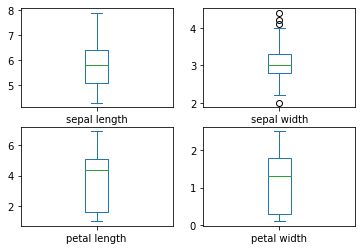

In [6]:
dataset.plot(kind="box",subplots=True,layout=(2,2),sharex=False,sharey=False)
pyplot.show()

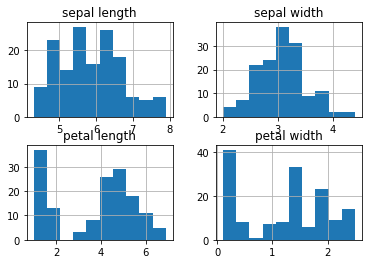

In [7]:
dataset.hist()
pyplot.show()

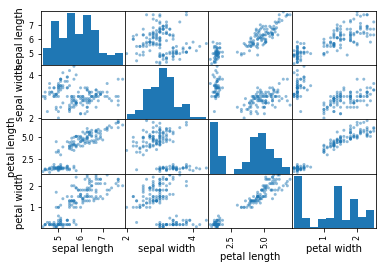

In [8]:
scatter_matrix(dataset)
pyplot.show()

In [10]:
array=dataset.values
x=array[:,0:4]
y=array[:,4]
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
models=[]
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC(gamma='auto')))

In [19]:
results=[]
names=[]
for name,model in models:
    kfold=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s : %f (%f)' % (name,cv_results.mean(),cv_results.std()))

LR : 0.941667 (0.065085)
LDA : 0.975000 (0.038188)
KNN : 0.958333 (0.041667)
NB : 0.950000 (0.055277)
SVM : 0.983333 (0.033333)


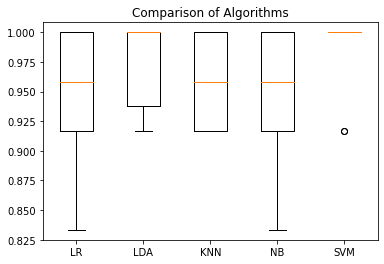

In [21]:
pyplot.boxplot(results,labels=names)
pyplot.title('Comparison of Algorithms')
pyplot.show()

In [22]:
model=SVC(gamma='auto')
model.fit(x_train,y_train)
prediction=model.predict(x_validation)
print(accuracy_score(y_validation,prediction))
print(confusion_matrix(y_validation,prediction))
print(classification_report(y_validation,prediction))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

